# female population and hk recycling rate

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.1924     21.089      8.117      0.000     126.885     215.500
female_pop -3.447e-05   5.47e-06     -6.303      0.000    -4.6e-05    -2.3e-05

R-squared: 0.6882


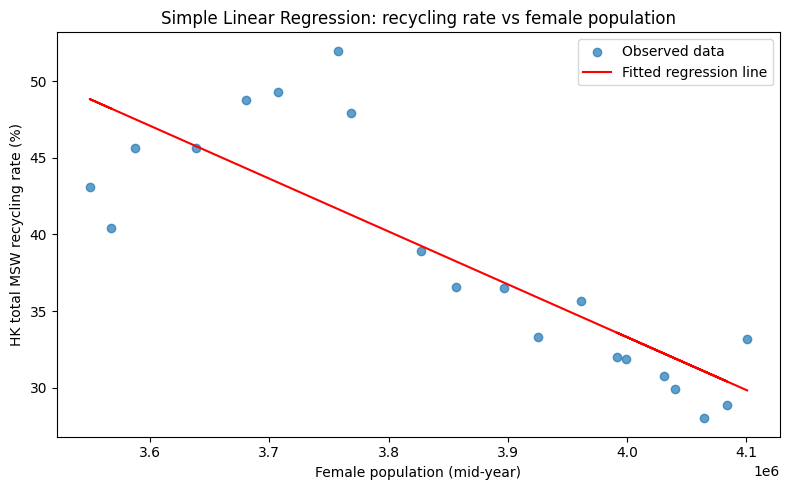

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset (HK MSW Volume and Recycling Rat sheet is the default first sheet)
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

# ---------- Simple Linear Regression: recycling_rate vs female_population ----------

# Column names (follow the cleaned-data headers exactly)
col_female = "Female population (mid-year)"
col_rate   = "HK total MSW recycling rate"

# Prepare data
# Convert population like "3,567,100" → 3567100
female_series = pd.to_numeric(
    df[col_female].astype(str).str.replace(",", ""),
    errors="coerce"
)

# Convert rate like "40%" or 0.40 → 40.0
rate_raw = df[col_rate].astype(str).str.rstrip("%")
rate_series = pd.to_numeric(rate_raw, errors="coerce")

# If rates are stored as proportions (≤ 1.0), turn them into percentages
if rate_series.max() <= 1.0:
    rate_series = rate_series * 100.0

# Keep rows where both variables are present
mask = female_series.notna() & rate_series.notna()
X_female = female_series.loc[mask].to_frame(name="female_pop")  # shape (n, 1)
y_rate   = rate_series.loc[mask]                                # shape (n,)

# Fit model using sklearn for predictions
lin_reg_f = LinearRegression()
lin_reg_f.fit(X_female, y_rate)

# Fit model using statsmodels for statistical tests
X_female_sm = sm.add_constant(X_female)  # Add constant term for intercept
model_f = sm.OLS(y_rate, X_female_sm)
results_f = model_f.fit()

# Predictions for plotting
y_pred_f = lin_reg_f.predict(X_female)

print("Model Summary:")
print(results_f.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_f.rsquared:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_female, y_rate, alpha=0.7, label="Observed data")
plt.plot(X_female, y_pred_f, color="red", label="Fitted regression line")
plt.xlabel("Female population (mid-year)")
plt.ylabel("HK total MSW recycling rate (%)")
plt.title("Simple Linear Regression: recycling rate vs female population")
plt.legend()
plt.tight_layout()
plt.show()


**Female-population coefficient ($\hat \beta_1$) ≈ -0.000034 (p ≈ 0.0000 < 0.05)**  

- There is a **statistically significant negative association** between Hong Kong‘s female population and the overall MSW recycling rate: years with a larger female population tend to have a slightly lower territory-wide recycling percentage.  

- Female population alone explains a **substantial share of the variation in recycling performance** (about **69% of the variance**, based on R-squared approx 0.69), but other policy, economic, and behavioural factors are still important in determining the recycling rate.
